##
TITLE

First Part

In [2]:
from sympy import Symbol, Function
from sympy import integrate
from sympy import *

C, t, C1 = symbols("C t C1")
x = Function("x")

diffeq = Eq(x(t).diff(t), C*x(t))
sol = dsolve(diffeq, x(t)).rhs

conditions = (sol.subs(t, 0) - 10, sol.subs(t, 20) - 20)
print(conditions)
solutions = nonlinsolve(conditions, (C, C1))

print(solutions)

(C1 - 10, C1*exp(20*C) - 20)
{(log(2)/20, 10), (ImageSet(Lambda(_n, _n*I*pi/10 + Mod(Mod(log(2), 2*I*pi)/20, I*pi/10)), S.Integers), 10)}


In [3]:
#TODO 1b


2

In [4]:
my_data = [[0.5,1.27],[0.6,6.58],[0.7,7.00],[0.8,8.83],[0.9,8.66],[1.0,5.53],[1.1,9.33],[1.2,14.57],[1.3,8.51],[1.4,17.61],[1.5,12.94],[1.6,18.45],[1.7,19.85],[1.8,25.03],[1.9,28.14],[2.0,28.31],[2.1,33.41],[2.2,41.43],[2.3,40.87],[2.4,56.71],[2.5,59.32]]

my_data_x = [a for a,b in my_data]
my_data_y = [b for a,b in my_data]

In [5]:
import numpy as np

max_degree = 4
fitted_funcs = [np.poly1d(np.polyfit(my_data_x, my_data_y, i)) for i in range(1, max_degree)]

for fitted_func in fitted_funcs:
    print(fitted_func.c)

preds = [fitted_func(my_data_x) for fitted_func in fitted_funcs]

[ 24.97883117 -15.92777056]
[ 16.01095129 -23.0540227   14.2261877 ]
[ 10.16326499 -29.72374117  38.86058762 -10.0436891 ]


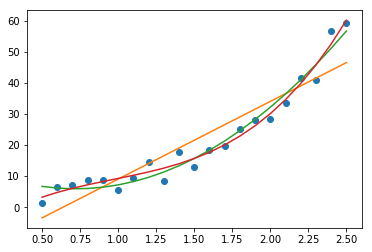

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(my_data_x, my_data_y, 'o')
for i_f, fitted_func in enumerate(fitted_funcs):
    plt.plot(my_data_x, preds[i_f])

The data fits much better with a second order polynomyal than with a first order therefore, whatever it represents has exponential growth. 

We choose the degree of the polynomial to be equal to 2 because it fits the data good enough. Obviously as we increase the degree we will find better fits (even a curve that completely fits the data) but we assume the data is noisy and a high degree will overfit.


Do we assume the data is noisy? We can fit it perfectly with degree=100

In [7]:
chosen_degree = 2
fitted_func = fitted_funcs[chosen_degree-1]
print("Coeficients of the polinomial which is the derivative of the fitted function", fitted_func.deriv().c) #Coefficients of the derivative. The corresponding degrees are in decreasing order but check

Coeficients of the polinomial which is the derivative of the fitted function [ 32.02190258 -23.0540227 ]


In [8]:
mean_absolute_error = sum([abs(fitted_func(my_data_x[i]) - my_data_y[i]) for i in range(len(my_data_x))]) / len(my_data_x)
print("Mean absolute error of the fitted function", mean_absolute_error)

Mean absolute error of the fitted function 2.48106837393


3

In [173]:
S = Function("S")
I = Function("I")
R = Function("R")
Beta = Function("Beta")

beta_0, S_0, I_0, R_0 = symbols("beta_0 S_0 I_0 R_0")

mu, gamma, t, T = symbols("mu gamma t T")


S_eq = Eq(S(t).diff(t), mu - mu*S(t) - Beta(t) * I(t) * S(t))
I_eq = Eq(I(t).diff(t), Beta(t)*I(t)*S(t) - (gamma + mu)*I(t))
R_eq = Eq(R(t).diff(t), gamma*I(t) - mu*R(t))

reproduction_rate = integrate(Beta(t)/(mu + gamma), (t, 0, T)) / T

Beta_expr = beta_0*(1+sin(2*pi*t/T))

In [203]:
S_expr = dsolve(S_eq).rhs
I_expr = dsolve(I_eq).rhs
R_expr = dsolve(R_eq).rhs

print(S_expr)
print(S_expr.replace(t, 10))

(C1 + mu*Integral(exp(Integral(mu, t))*exp(Integral(Beta(t)*I(t), t)), t))*exp(-Integral(mu + Beta(t)*I(t), t))


ValueError: Invalid limits given: ((10,),)

In [175]:
I_0 = 0.5

conditions_S = (S_expr.subs(t, 0), ) #Meaning that t=0 -> S=0
conditions_R = (R_expr.subs(t, 0), ) #Meaning that t=0 -> R=0
conditions_I = (I_expr.subs(t, 0) - I_0, )

sol_C_S = nonlinsolve(conditions_S, (C1, ))
sol_C_R = nonlinsolve(conditions_R, (C1, ))
sol_C_I = nonlinsolve(conditions_I, (C1, ))

S_expr = S_expr.subs(C1, next(iter(sol_C_S))[0])
R_expr = R_expr.subs(C1, next(iter(sol_C_R))[0])
I_expr = I_expr.subs(C1, next(iter(sol_C_I))[0])

In [188]:
d = [
    (t, 10),
    (mu, 0.5),
    (gamma, 0.5),
    (T, 15),
    (S_0, 0),
    (I_0, 0),
    (R_0, 0),
    (beta_0, 0.5)
]



Beta_sub = Beta_expr.subs(d)
d.append((Beta, Beta_sub))

S_sub = S_expr.subs(d)

print(Beta_sub)
print(S_sub)

#R_sub = R.subs(d)
#I_sub = I.subs(d)
#print(R_sub)
#print(I_sub)
#print(Beta, Beta_sub)

0.500000000000000
0


In [201]:
print(S_expr)
print(S_expr.subs(mu, 0.5).replace(t, 10))

(mu*Integral(exp(Integral(mu, t))*exp(Integral(Beta(t)*I(t), t)), t) - mu*Integral(exp(Integral(mu, t))*exp(Integral(Beta(t)*I(t), t)), (t, 0)))*exp(-Integral(mu + Beta(t)*I(t), t))


ValueError: Invalid limits given: ((10,),)